# Exploratory Data Analysis on Titanic Dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#T he  Data
df=pd.read_csv("D:/AI&ML Internship/titanic_dataset.csv")


In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Exploratory Data Analysis

In [5]:
# Checking missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

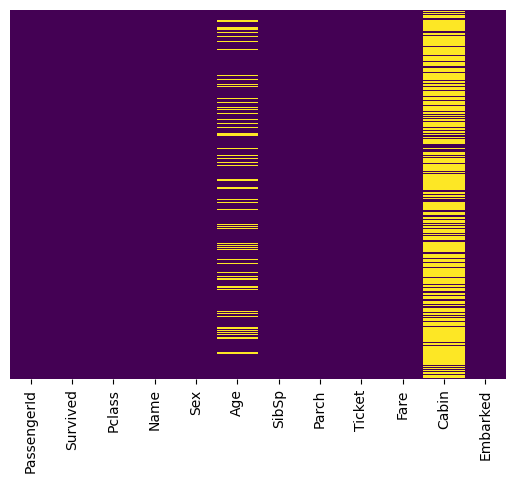

In [14]:
# Check missing value using graph
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

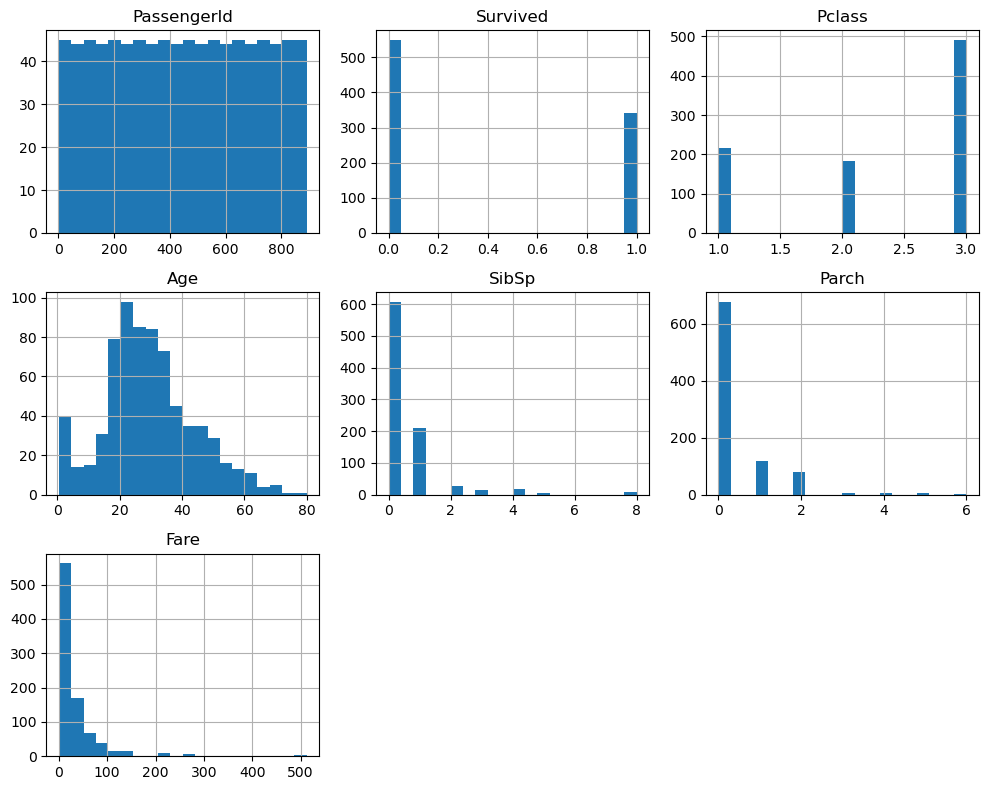

In [6]:
df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

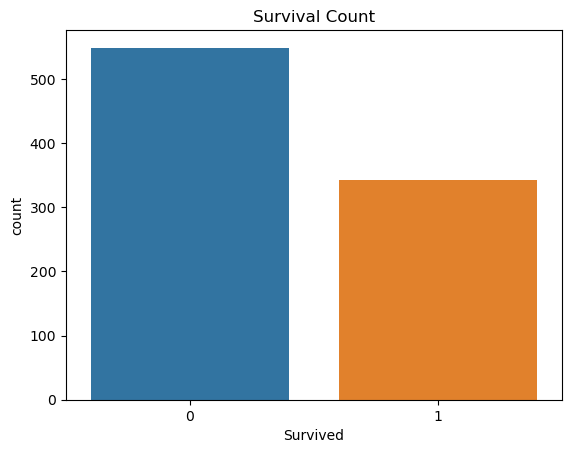

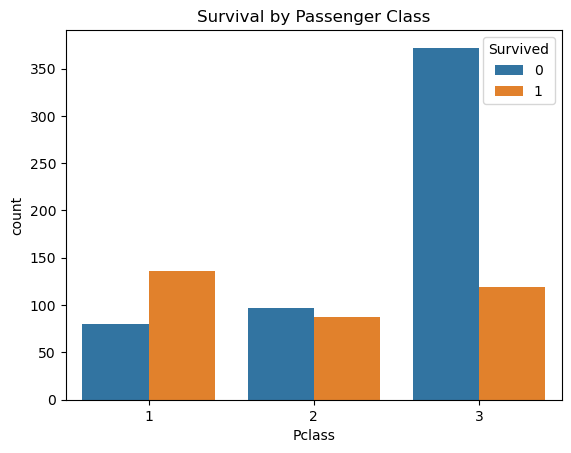

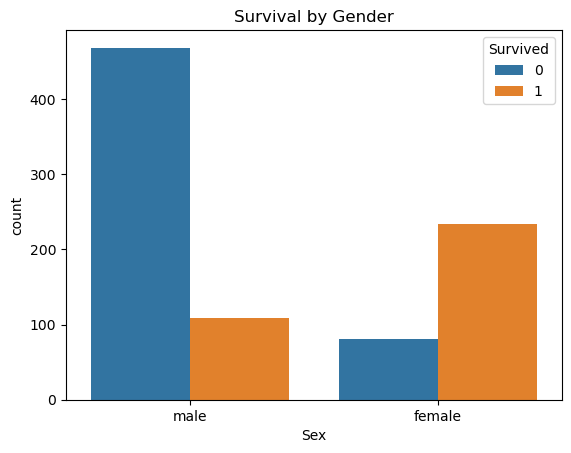

In [10]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

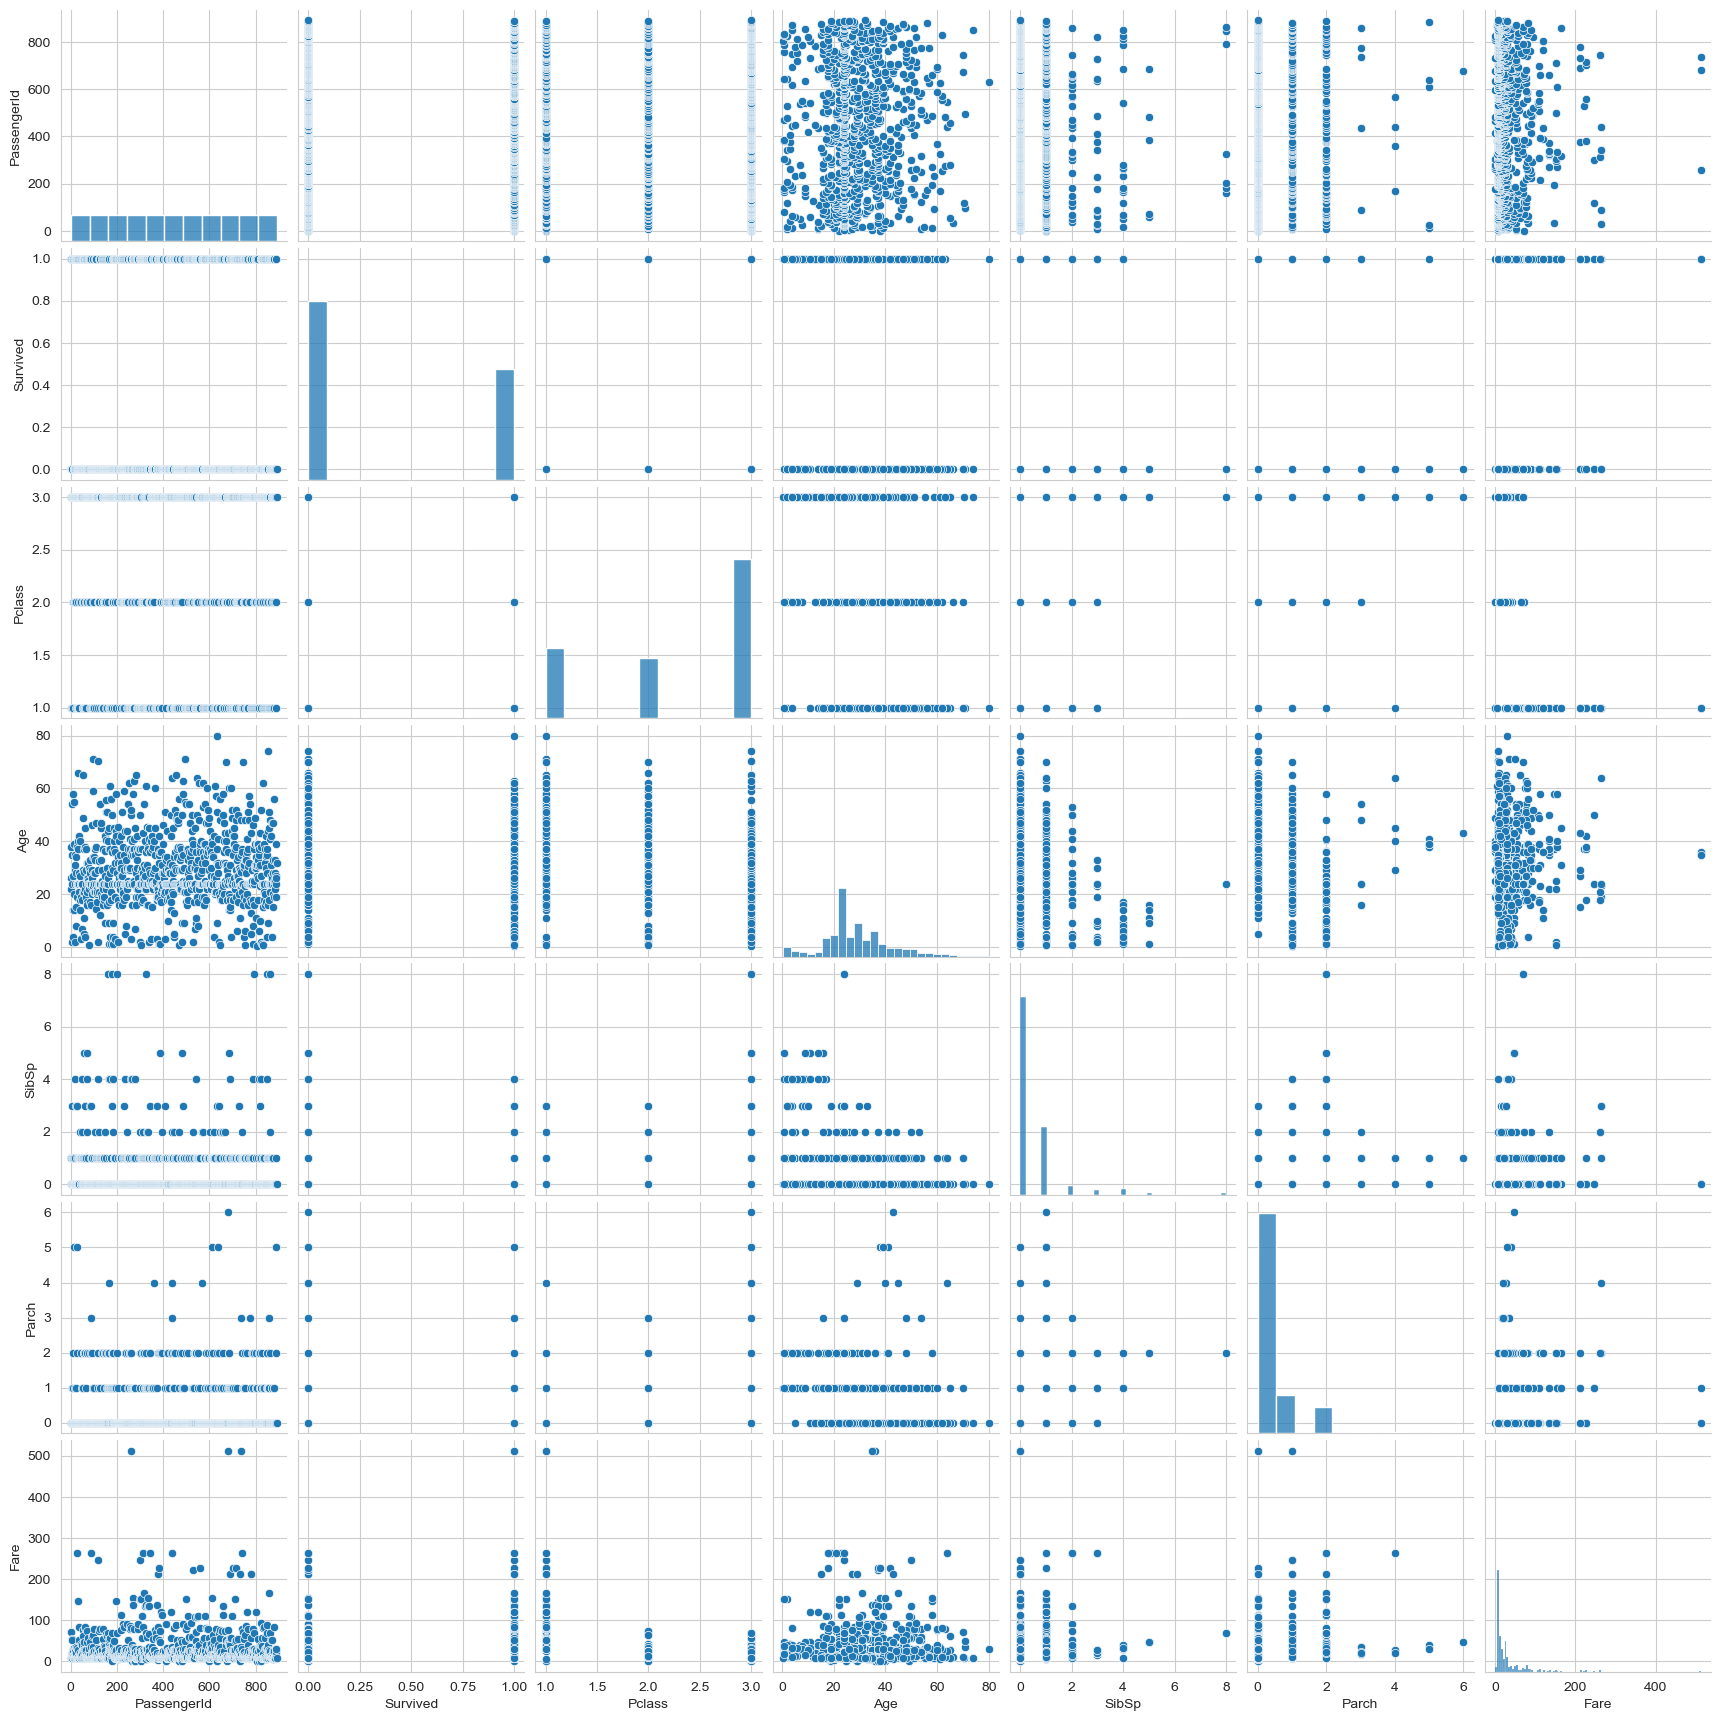

In [35]:
#plot of pairplot
sns.pairplot(df)

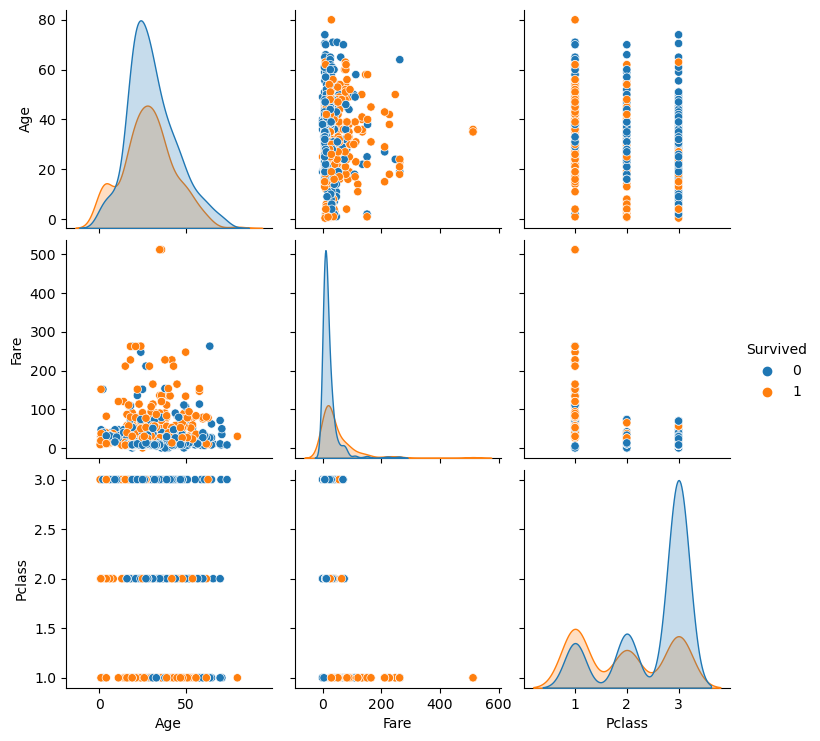

In [9]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

C:\Users\Rudra\AppData\Local\Temp\ipykernel_14356\799389714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"].dropna(),kde=False,color="darkred",bins=40)


<Axes: xlabel='Age'>

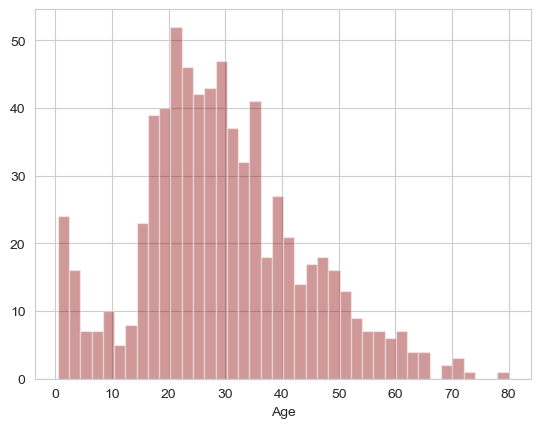

In [21]:
sns.distplot(df["Age"].dropna(),kde=False,color="darkred",bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

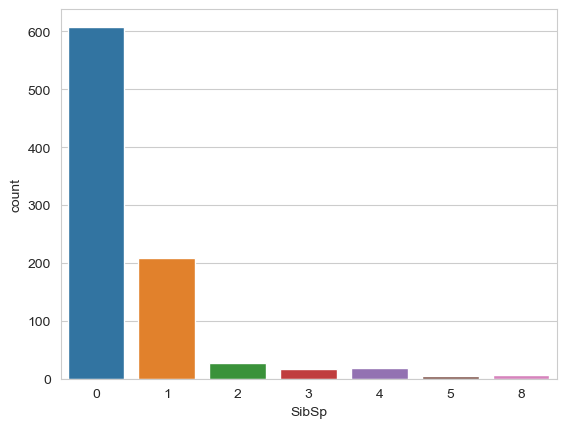

In [22]:
sns.countplot(x="SibSp",data=df)

<Axes: >

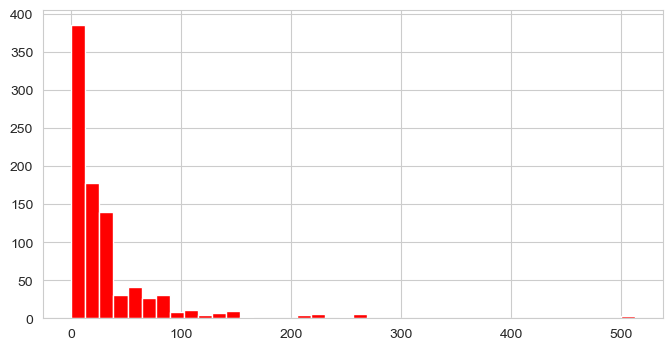

In [23]:
df["Fare"].hist(color="red",bins=40,figsize=(8,4))

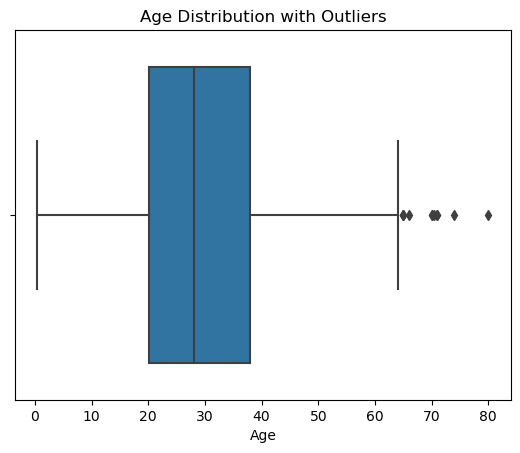

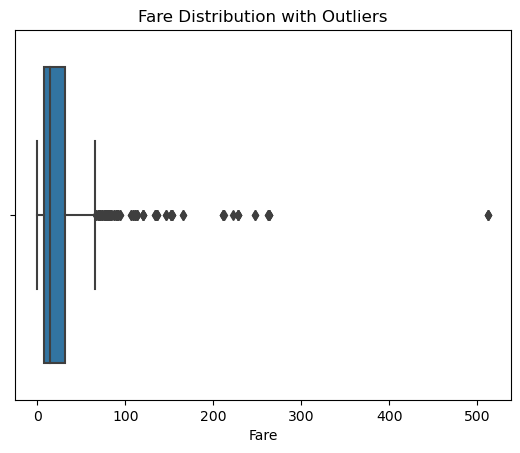

In [7]:
sns.boxplot(x='Age', data=df)
plt.title("Age Distribution with Outliers")
plt.show()

sns.boxplot(x='Fare', data=df)
plt.title("Fare Distribution with Outliers")
plt.show()


<Axes: xlabel='Pclass', ylabel='Age'>

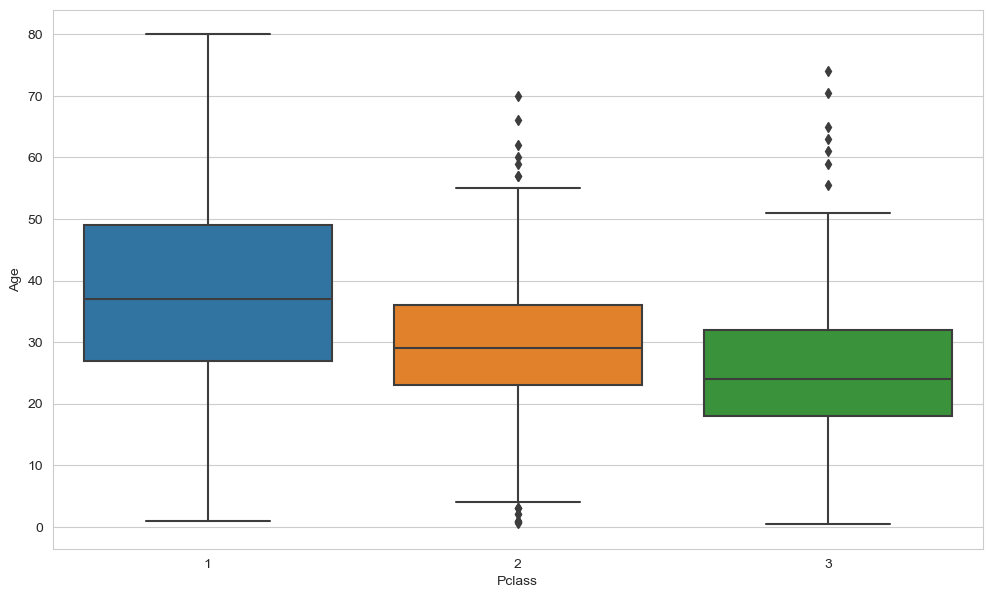

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df)

In [29]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
df["Age"]=df[["Age","Pclass"]].apply(input_age,axis=1)

<Axes: >

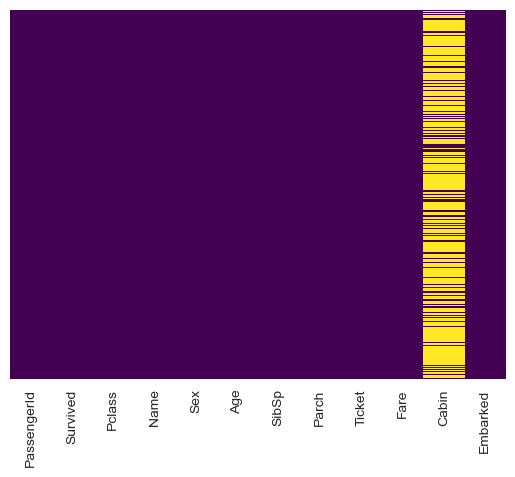

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
df.drop("Cabin",axis=1,inplace=True)


In [33]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

<Axes: >

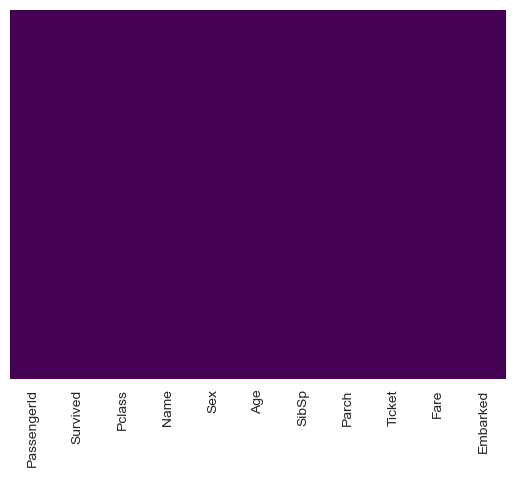

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

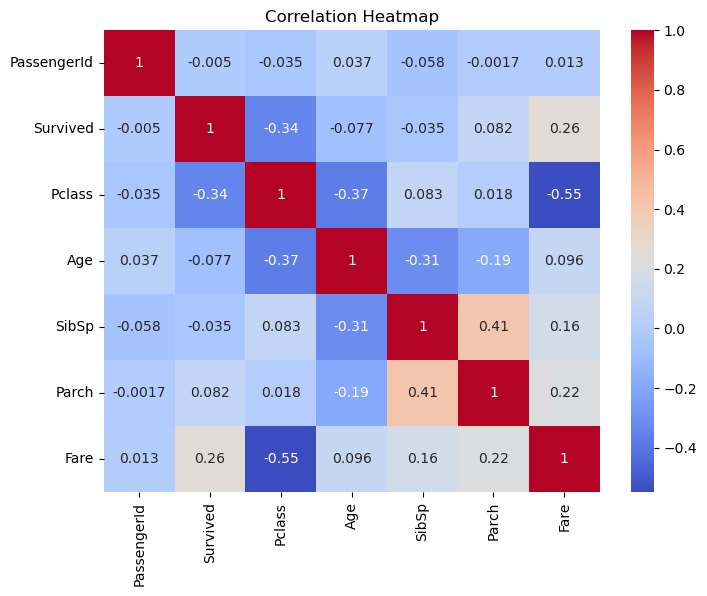

In [8]:
#plot of heatmap

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
df.shape

(891, 11)

In [11]:
fig = px.box(df, x="Pclass", y="Age", color="Survived", title="Age vs Class by Survival")
fig.show()
